In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import time 
import datetime 

In [ ]:
# Loading dataset
orig_df = pd.read_csv('/content/drive/MyDrive/delhi_weather_final.csv')
df = orig_df.copy()
df.columns = ['Date' , 'Temperature', 'Pressure' , 'Humidity']
print(df.shape)
df.head(5)

(100990, 4)


,Date,Temperature,Pressure,Humidity
0,19961101-11:00,30.0,1010.0,27.0
1,19961101-12:00,28.0,-9999.0,32.0
2,19961101-13:00,24.0,-9999.0,44.0
3,19961101-14:00,24.0,1010.0,41.0
4,19961101-16:00,23.0,1011.0,47.0


In [ ]:
df.describe()

,Temperature,Pressure,Humidity
count,100317.000000,1.007580e+05,100233.000000
mean,25.451269,1.932331e+03,57.909481
std,8.482859,3.183786e+05,23.807771
min,1.000000,-9.999000e+03,4.000000
25%,19.000000,1.002000e+03,39.000000
50%,27.000000,1.008000e+03,59.000000
75%,32.000000,1.014000e+03,78.000000
max,90.000000,1.010614e+08,243.000000


In [ ]:
df = df[(df['Humidity'] >= 39) & (df['Humidity'] <= 78)]
df = df[(df['Pressure'] >= 1002.0) & (df['Pressure'] <= 1014.0)]
df = df[(df['Temperature'] >= 19.0) & (df['Temperature'] <= 32.0)]

max_temp = np.max(df['Temperature'])
max_pres = np.max(df['Pressure'])
max_humid = np.max(df['Humidity'])

min_temp = np.min(df['Temperature'])
min_pres = np.min(df['Pressure'])
min_humid = np.min(df['Humidity'])

print(f'Max Temp : {max_temp}')
print(f'Max Pressure : {max_pres}')
print(f'Max Humidity : {max_humid}')

print(f'Min Temp : {min_temp}')
print(f'Min Pressure : {min_pres}')
print(f'Min Humidity : {min_humid}')

Max Temp : 32.0
Max Pressure : 1014.0
Max Humidity : 78.0
Min Temp : 19.0
Min Pressure : 1002.0
Min Humidity : 39.0


In [ ]:
df.isnull().sum()

Date           0
Temperature    0
Pressure       0
Humidity       0
dtype: int64

In [ ]:
df.shape

(19874, 4)

In [ ]:
df.head()

,Date,Temperature,Pressure,Humidity
3,19961101-14:00,24.0,1010.0,41.0
4,19961101-16:00,23.0,1011.0,47.0
5,19961101-17:00,21.0,1011.0,56.0
6,19961101-18:00,21.0,1010.0,60.0
9,19961101-21:00,19.0,1010.0,68.0


In [ ]:
temp_df = df[df['Date'].str.contains('14:') == True]
temp_df.shape

(626, 4)

In [ ]:
temp_df.head()

,Date,Temperature,Pressure,Humidity
3,19961101-14:00,24.0,1010.0,41.0
26,19961102-14:00,22.0,1010.0,53.0
50,19961103-14:00,22.0,1011.0,57.0
90,19961106-14:00,20.0,1012.0,52.0
113,19961107-14:00,22.0,1014.0,46.0


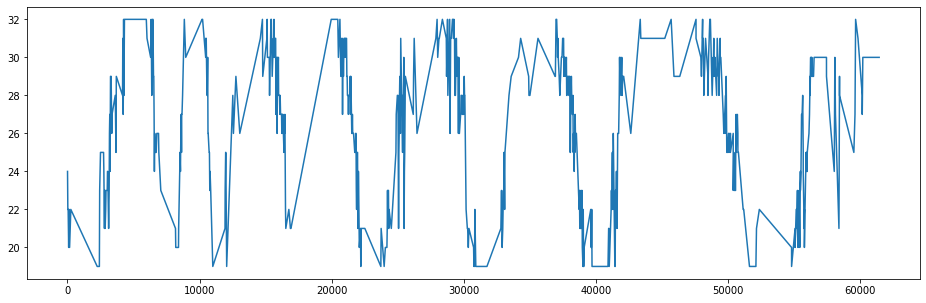

In [ ]:
plt.figure(figsize = (16,5))
plt.plot(temp_df['Temperature'])

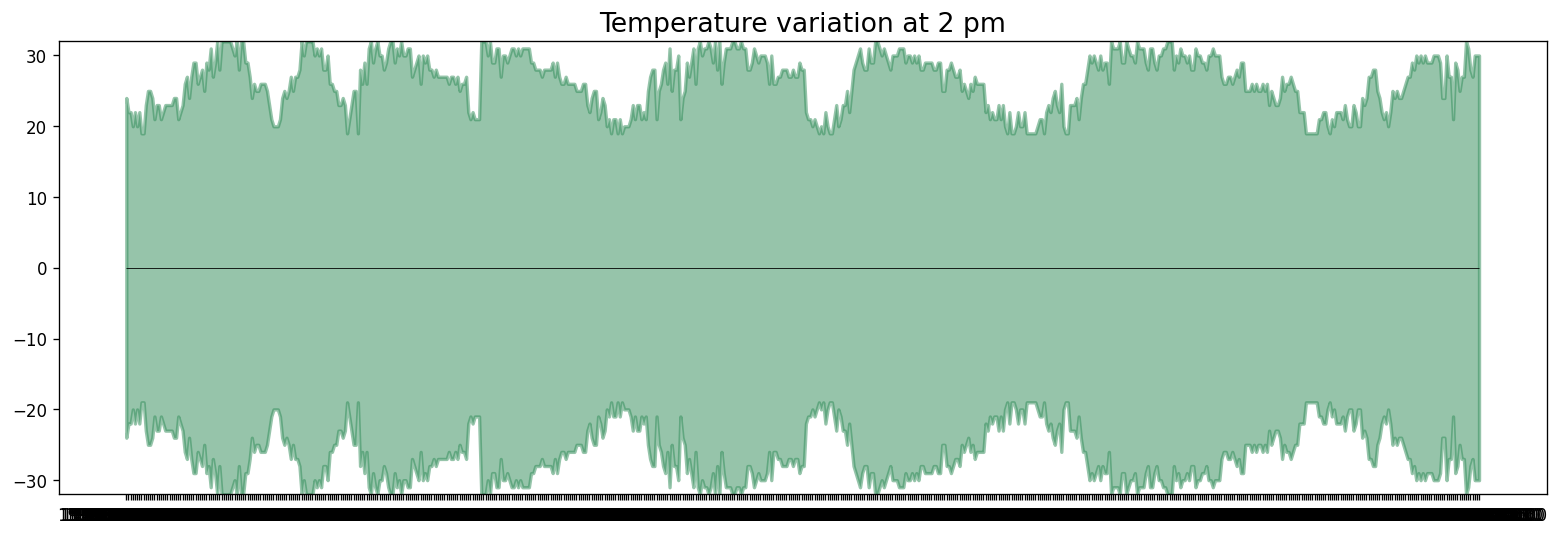

In [ ]:
x = temp_df['Date'].values
y1 = temp_df['Temperature'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-32, 32)
plt.title('Temperature variation at 2 pm', fontsize=16)
plt.hlines(y=0, xmin=np.min(temp_df.Date), xmax=np.max(temp_df.Date), linewidth=.5)
plt.show()

In [ ]:
temp_df.tail()

,Date,Temperature,Pressure,Humidity
60182,20040608-14:00,28.0,1002.0,58.0
60183,20040608-14:30,27.0,1002.0,58.0
60226,20040609-14:30,30.0,1003.0,58.0
61463,20040916-14:00,30.0,1007.0,70.0
61464,20040916-14:30,30.0,1008.0,70.0


In [ ]:
idx = pd.date_range('1996-11-01 14:00:00', periods=626 , freq='1h')

temp_df = temp_df.set_index(idx)
temp_df.index.name = 'Timestamp' 
temp_df.head()

,Date,Temperature,Pressure,Humidity
Timestamp,,,,
1996-11-01 14:00:00,19961101-14:00,24.0,1010.0,41.0
1996-11-01 15:00:00,19961102-14:00,22.0,1010.0,53.0
1996-11-01 16:00:00,19961103-14:00,22.0,1011.0,57.0
1996-11-01 17:00:00,19961106-14:00,20.0,1012.0,52.0
1996-11-01 18:00:00,19961107-14:00,22.0,1014.0,46.0


In [ ]:
temp_df['Temperature'] = temp_df['Temperature'] / 50 

### Decomposing Time series into its components 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

result_mul = seasonal_decompose(temp_df['Temperature'], model='multiplicative')

# Additive Decomposition
result_add = seasonal_decompose(temp_df['Temperature'], model='additive')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Mulplicative Decompose 

Text(0.5, 0.98, 'Multiplicative Decompose')

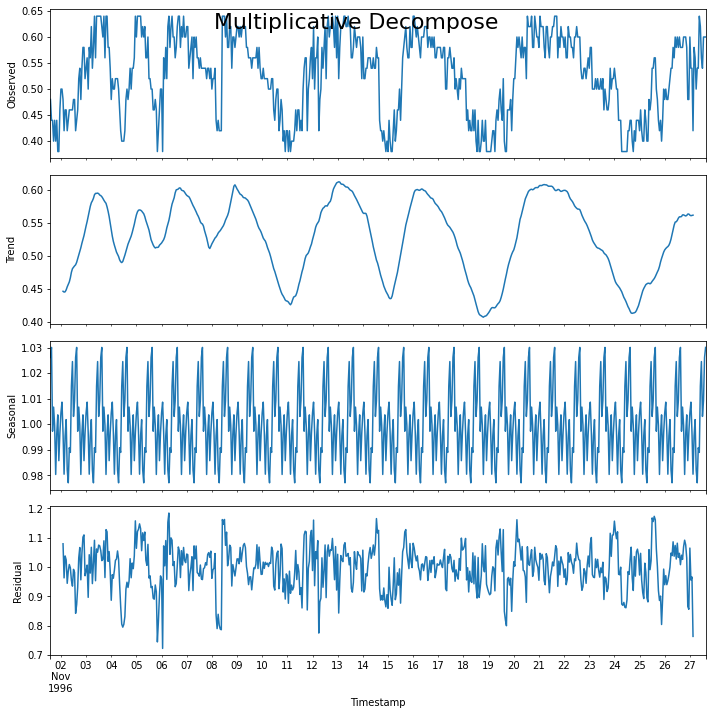

In [ ]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

#### Additive Decompose 

Text(0.5, 0.98, 'Additive Decompose')

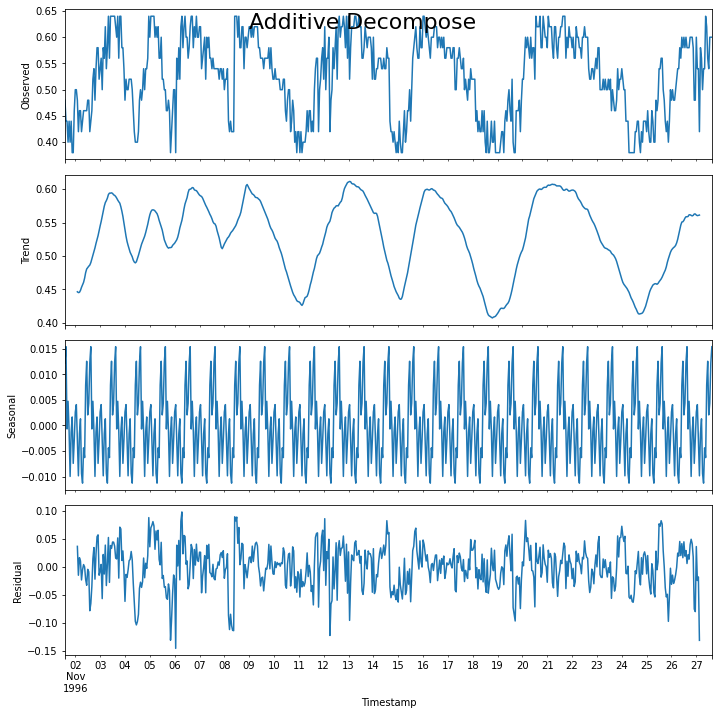

In [ ]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)

### Detrend 

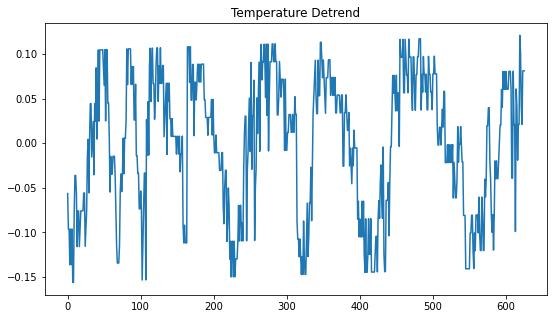

In [ ]:
plt.rcParams.update({'figure.figsize': (9,5)})
from scipy import signal
detrended = signal.detrend(temp_df['Temperature'])
plt.title('Temperature Detrend')
plt.plot(detrended)

# Working For ARIMA 

### Finding the differencing value 

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(temp_df['Temperature'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.036295
p-value: 0.001232


Since the p value is << 0.05 there for series is stationary and we don't actually need to perform differencing 

### Verifying differencing with graph 

#### no differencing (d = 0)

<function matplotlib.pyplot.plot>

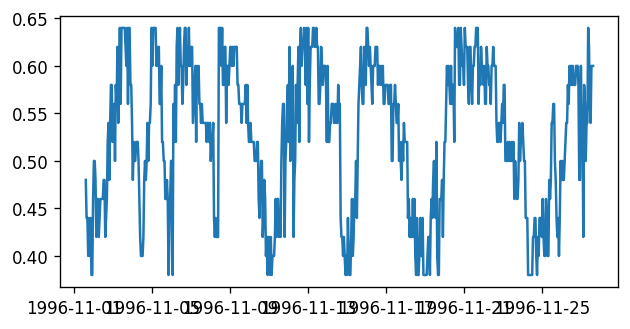

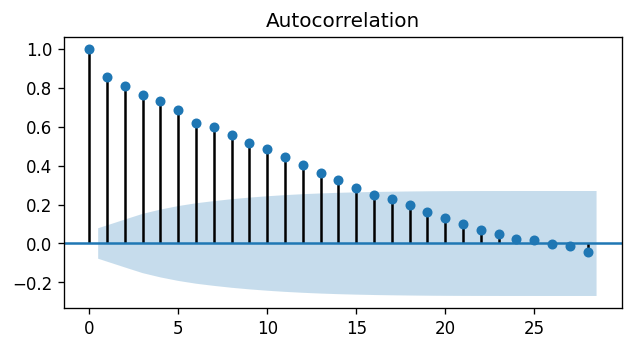

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.plot(temp_df['Temperature'])
plot_acf(temp_df['Temperature'])
plt.plot

#### first order differencing (d = 1)

[]

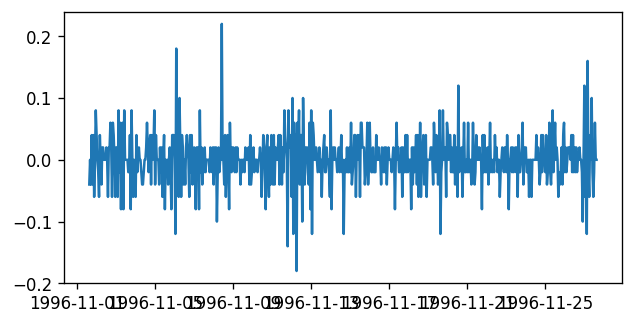

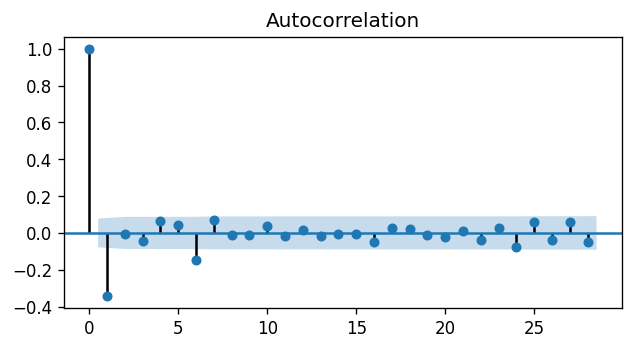

In [ ]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.plot(temp_df['Temperature'].diff()); 
plot_acf(temp_df['Temperature'].diff().dropna())
plt.plot()

#### second order differencing (d = 2)

[]

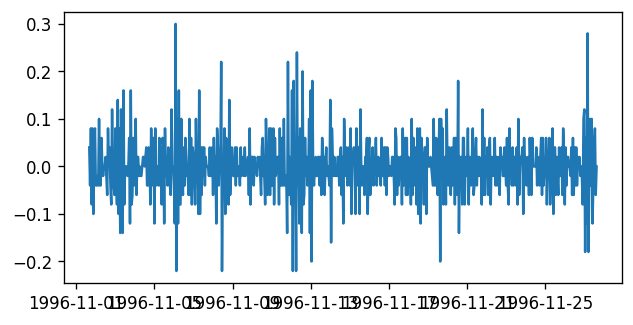

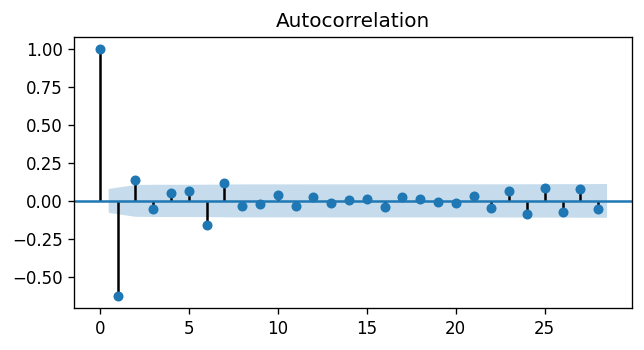

In [ ]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.plot(temp_df['Temperature'].diff().diff()); 
plot_acf(temp_df['Temperature'].diff().diff().dropna())

plt.plot()

As we can see, autorelation value quickly becomes negative in the second graph, therefore we fix the value of d  as 0 

### Finding the order of AR term (p)

#### no differencing 

[]

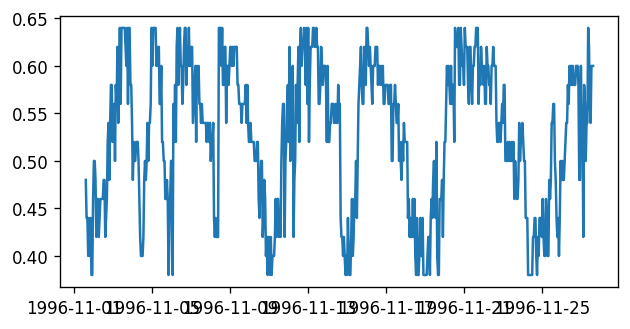

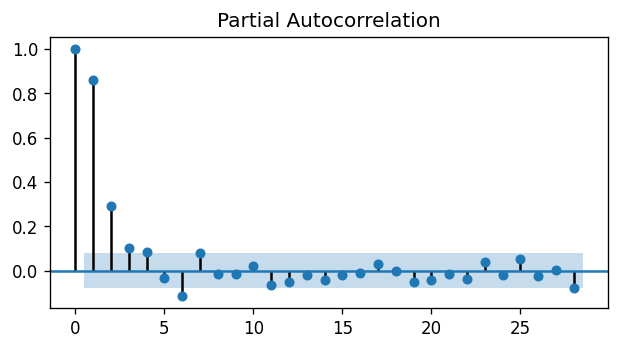

In [ ]:

plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.plot(temp_df.Temperature)
plot_pacf(temp_df.Temperature.dropna())
plt.plot()

As we can see the first two lines of PACF are significant therefore we keep as 2

#### first order differencing 

[]

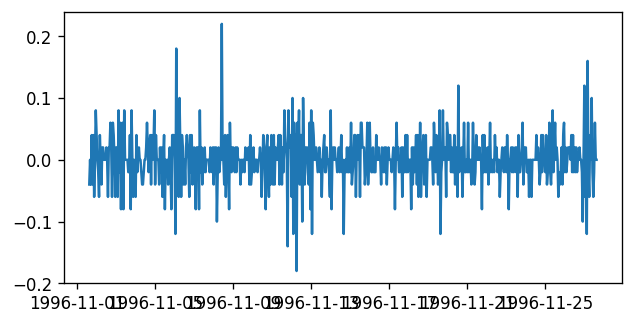

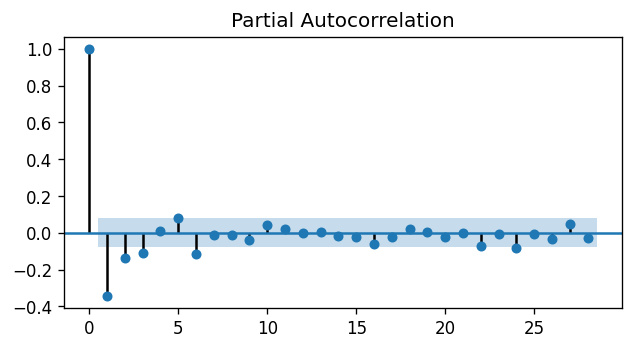

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})

plt.plot(temp_df.Temperature.diff())
plot_pacf(temp_df.Temperature.diff().dropna())
plt.plot()

### Finding order of MA term 

#### no differencing 

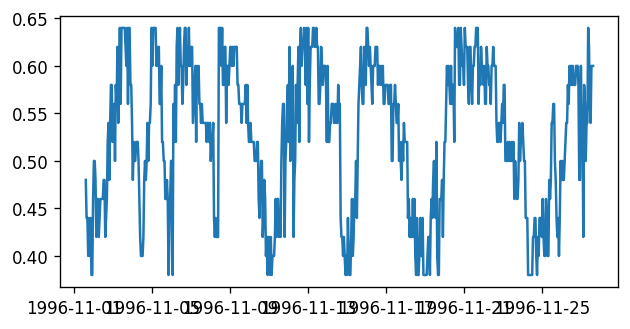

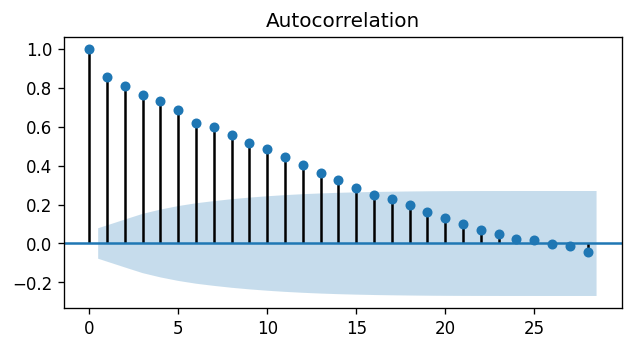

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})

plt.plot(temp_df.Temperature)
plot_acf(temp_df.Temperature.dropna())

plt.show()

#### first order differncing 

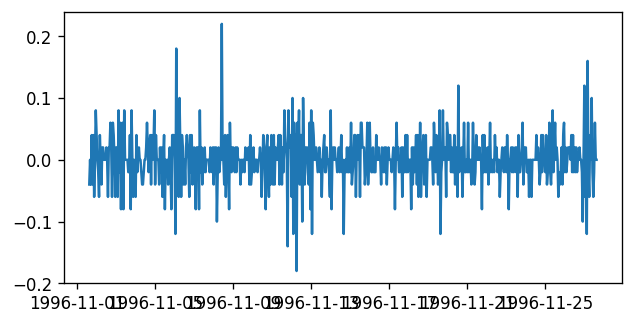

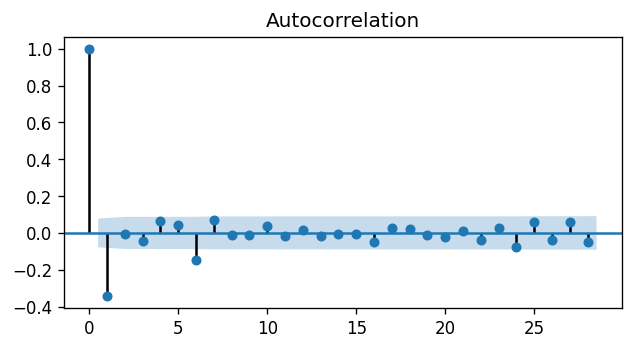

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})

plt.plot(temp_df.Temperature.diff())
plot_acf(temp_df.Temperature.diff().dropna())

plt.show()

 we fix the value of q as 2

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model  (p,d,q)
model = ARIMA(temp_df.Temperature, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:            Temperature   No. Observations:                  626
Model:                     ARMA(2, 2)   Log Likelihood                1177.476
Method:                       css-mle   S.D. of innovations              0.037
Date:                Fri, 26 Nov 2021   AIC                          -2342.951
Time:                        09:18:05   BIC                          -2316.315
Sample:                    11-01-1996   HQIC                         -2332.602
                         - 11-27-1996                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5300      0.002    256.160      0.000       0.526       0.534
ar.L1.Temperature     1.9510      0.013    146.966      0.000       1.925       1.977
ar.L2.Temperature    -0.

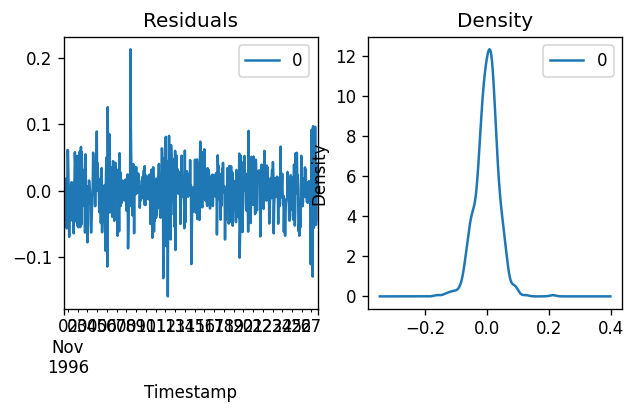

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

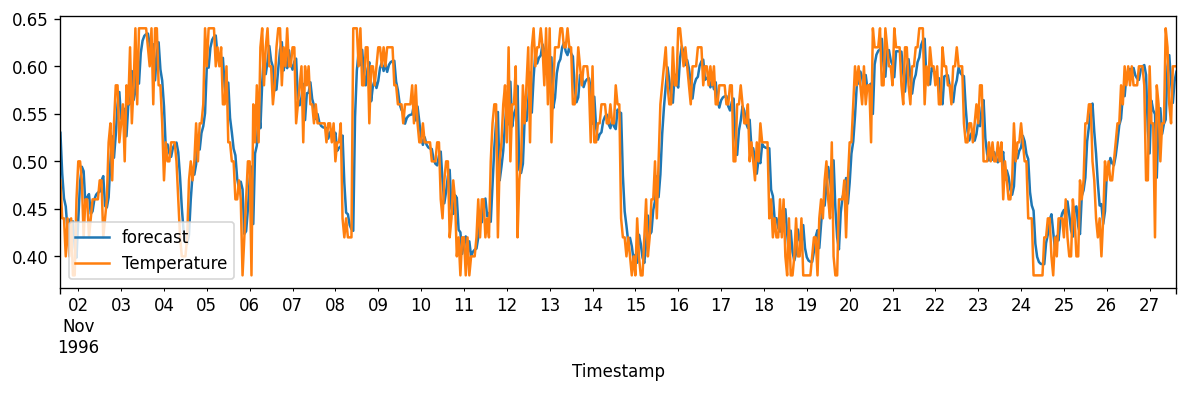

In [ ]:
# Actual vs Fitted
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
model_fit.plot_predict(dynamic=False)
plt.show()